<a href="https://colab.research.google.com/github/hau17/ptdl-python/blob/main/DA04/Feature_Engineering_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Dataset


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
# Downloading the iris dataset
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]

# Set the path to the file you'd like to load
file_path = "Iris.csv"

# Load the latest version
dataset_path = kagglehub.dataset_download("uciml/iris", file_path)

# Load the data into a pandas DataFrame
iris_df = pd.read_csv(dataset_path)

# Assuming you still want to use 'iris' and 'class_names' as in the original code structure
# This part might need adjustment depending on how you intend to use these variables later.
# For now, we will create dummy variables based on the iris_df
from sklearn.utils import Bunch
iris = Bunch(data=iris_df.drop('Species', axis=1).values,
             target=iris_df['Species'].astype('category').cat.codes.values,
             target_names=iris_df['Species'].astype('category').cat.categories.values,
             feature_names=iris_df.drop('Species', axis=1).columns.tolist())
class_names = iris.target_names

Using Colab cache for faster access to the 'iris' dataset.


In [ ]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Splitting dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(
iris_df[['SepalLengthCm', 'SepalWidthCm',
'PetalLengthCm','PetalWidthCm']],
iris_df['Species'],
test_size=0.2,
random_state=2021)

## Modeling and Results

In [ ]:
# Import Naive Bayes
# In this case, I assume features follow a normal distribution
NB = GaussianNB()
# Train Naive Bayes Model
NB.fit(X_train, y_train)
print("Training accuracy: {:.2f}".format(NB.score(X_train, y_train)))
# Evaluate Model on test set
y_predict = NB.predict(X_test)
print("Testing accuracy NB: {:.2f}".format(NB.score(X_test, y_test)))

Training accuracy: 0.97
Testing accuracy NB: 0.93


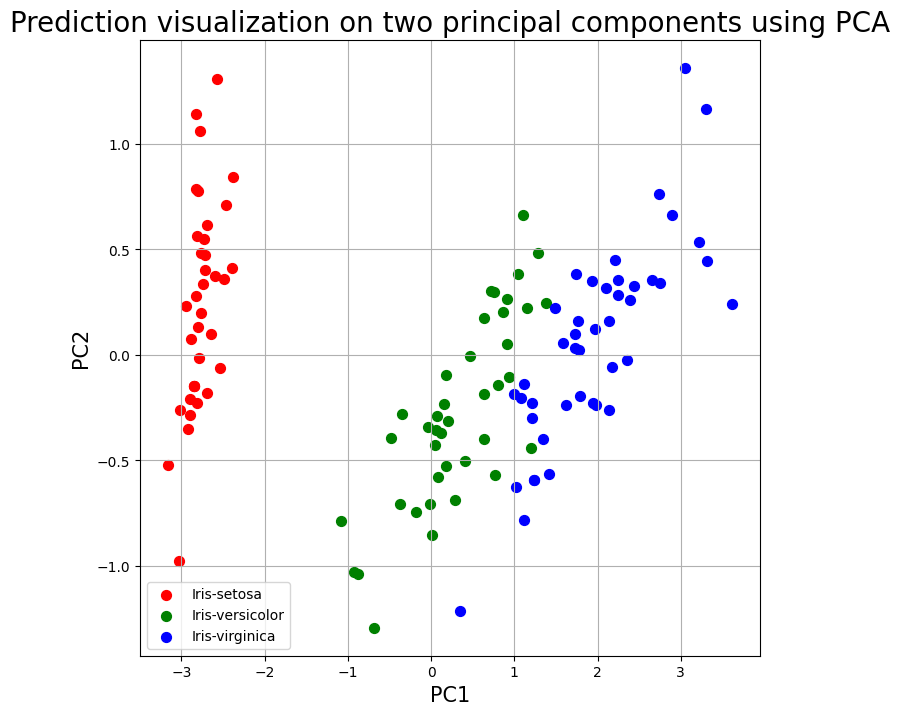

In [ ]:
# Visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
finalDf = pd.concat([principalDf, y_train.reset_index(drop=True)], axis=1)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('Prediction visualization on two principal components using PCA',
fontsize=20)
targets = [0, 1, 2]
targets_2_desc = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Species'] == targets_2_desc[target]
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
               finalDf.loc[indicesToKeep, 'PC2'],
               c=color,
               s=50,
               label=targets_2_desc[target])
ax.legend()
ax.grid()

Mô tả
* Đây là một biểu đồ phân tán (scatter plot) hiển thị dữ liệu tập huấn luyện đã được giảm xuống còn 2 chiều bằng PCA, sử dụng hai thành phần chính: PC1 (trục hoành) và PC2 (trục tung).

Mục đích
* Biểu đồ này giúp trực quan hóa khả năng phân tách của 3 lớp hoa diên vĩ (Setosa, Versicolor, Virginica) trong không gian 2D, xác nhận tại sao mô hình Naive Bayes lại đạt độ chính xác cao.


Phân tích từng lớp
* Iris-setosa (Màu Đỏ, được mã hóa là 0): Các điểm dữ liệu này được nhóm lại rất chặt chẽ và tách biệt hoàn toàn khỏi hai lớp còn lại. Chúng nằm ở góc trên-bên trái của biểu đồ (giá trị PC1 âm lớn, PC2 dương/âm). Sự phân tách rõ ràng này giải thích cho việc mô hình Naive Bayes sẽ dễ dàng phân loại lớp này với độ chính xác rất cao. * Iris-versicolor (Màu Xanh lá, được mã hóa là 1): Lớp này phân tán chủ yếu ở giữa biểu đồ (giá trị PC1 và PC2 dao động quanh 0).

*  Iris-virginica (Màu Xanh dương, được mã hóa là 2): Lớp này nằm chủ yếu ở bên phải biểu đồ (giá trị PC1 dương lớn).

Khả năng phân loại
* Setosa vs (Versicolor & Virginica): Có một khoảng trống rõ ràng ngăn cách Setosa với hai lớp kia, cho thấy chúng có sự khác biệt lớn về các đặc trưng ban đầu (chiều dài/rộng đài hoa và cánh hoa).
* Versicolor vs Virginica: Hai lớp này có sự chồng lấn đáng kể ở khu vực trung tâm của biểu đồ. Điều này cho thấy sự nhầm lẫn (misclassification) của mô hình (độ chính xác kiểm tra là 93% ) rất có thể xảy ra ở vùng giao thoa giữa Versicolor và Virginica.

Đánh giá chung
* Dựa trên biểu đồ PCA, các đặc trưng của bộ dữ liệu Iris là đủ tốt để phân biệt 3 lớp hoa. Mô hình Gaussian Naive Bayes hoạt động tốt vì các điểm dữ liệu phân cụm rõ ràng trong không gian đa chiều, và mô hình này giả định các đặc trưng tuân theo phân phối chuẩn (Normal Distribution).

# End